## Reproducing the Main Findings of the ProPublica Study

**Data:** https://github.com/propublica/compas-analysis  
**Article:** https://www.propublica.org/article/how-we-analyzed-the-compas-recidivism-algorithm  
**Story:** https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing

Summary of findings: This landmark study by ProPublica of Northpointe, Inc.'s tool for predicting criminal risk scores and criminal recidivism, the Correctional Offender Management Profiling for Alternative Sanctions (COMPAS), found that Black defendants were nearly twice as likely as white defendants to be misclassified as higher risk, while white defendants were about 1.7 times more likely than Black defendants to be misclassified as low risk. Below, I reproduce some of the main findings of the study, including the racial disparities in decile score distribution for both non-violent and violent crimes, and the false positive, false negative, true positive, and true negative rates of non-violent recidivism prediction for Black and white defendants.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# compas_path = 'compas-scores-two-years.csv'
url = 'https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv'
compas_df = pd.read_csv(url)

In [13]:
compas_df[compas_df['c_charge_degree'] == 'F'][['c_charge_desc']]

,c_charge_desc
0,Aggravated Assault w/Firearm
1,Felony Battery w/Prior Convict
2,Possession of Cocaine
3,Possession of Cannabis
4,arrest case no charge
...,...
7208,Possession of Cocaine
7209,Deliver Cannabis
7210,Leaving the Scene of Accident
7211,Aggravated Battery / Pregnant


In [5]:
compas_df_schema = pd.DataFrame(compas_df.dtypes)
#compas_df_schema.to_csv('compas_df_schema')

3.735126324368378
5.3687770562770565


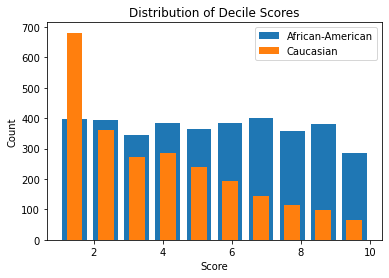

In [6]:
# plot distr of decile scores for black and white offenders
# we observe no true trend for black offenders, but a steady downward trend for white offenders 
# (this means that more white offenders are scored lower than higher)
b_decile = compas_df[compas_df['race'] == 'African-American']['decile_score']
w_decile = compas_df[compas_df['race'] == 'Caucasian']['decile_score']
print(w_decile.mean())
print(b_decile.mean())
plt.hist(b_decile, bins=10, rwidth=0.8)
plt.hist(w_decile, bins=10, rwidth=0.5)
plt.title('Distribution of Decile Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.legend(['African-American', 'Caucasian'])

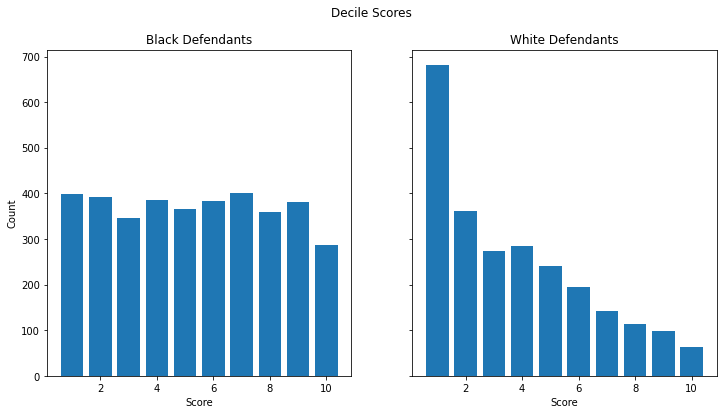

In [7]:
# plot distribution of decile scores for Black and white defendants

fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(12, 6))
fig.suptitle('Decile Scores')
b_decile_dic = {i:b_decile.tolist().count(i) for i in np.arange(1, 11)}
ax1.bar(b_decile_dic.keys(), b_decile_dic.values())
ax1.set_title('Black Defendants')
ax1.set_ylabel('Count')
ax1.set_xlabel('Score')
w_decile_dic = {i:w_decile.tolist().count(i) for i in np.arange(1, 11)}
ax2.bar(w_decile_dic.keys(), w_decile_dic.values())
ax2.set_title('White Defendants')
ax2.set_xlabel('Score');

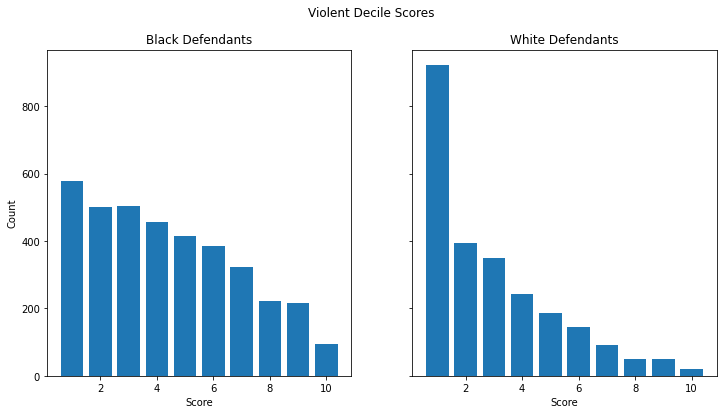

In [27]:
# repeat for violent decile scores

b_v_decile = compas_df[compas_df['race'] == 'African-American']['v_decile_score']
w_v_decile = compas_df[compas_df['race'] == 'Caucasian']['v_decile_score']

fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(12, 6))
fig.suptitle('Violent Decile Scores')
b_v_decile_dic = {i:b_v_decile.tolist().count(i) for i in np.arange(1, 11)}
ax1.bar(b_v_decile_dic.keys(), b_v_decile_dic.values())
ax1.set_title('Black Defendants')
ax1.set_ylabel('Count')
ax1.set_xlabel('Score')
w_v_decile_dic = {i:w_v_decile.tolist().count(i) for i in np.arange(1, 11)}
ax2.bar(w_v_decile_dic.keys(), w_v_decile_dic.values())
ax2.set_title('White Defendants')
ax2.set_xlabel('Score');

In [28]:
# compare misclassification rates (FP, FN, PPV, NPV) for non-violent recidivism

rows = compas_df.shape[0]
b_low_nr, b_high_nr, b_low_r, b_high_r = 0, 0, 0, 0
w_low_nr, w_high_nr, w_low_r, w_high_r = 0, 0, 0, 0
for i in range(rows):
    if compas_df.loc[i, 'race'] == 'African-American':
        risk_lvl = compas_df.loc[i, 'score_text']
        is_recid = compas_df.loc[i, 'two_year_recid']
        if risk_lvl == 'High' or risk_lvl == 'Medium':
            if is_recid: b_high_r += 1
            else: b_high_nr += 1
        elif risk_lvl == "Low":
            if is_recid: b_low_r += 1
            else: b_low_nr += 1
                
    if compas_df.loc[i, 'race'] == 'Caucasian':
        risk_lvl = compas_df.loc[i, 'score_text']
        is_recid = compas_df.loc[i, 'two_year_recid']
        if risk_lvl == 'High' or risk_lvl == 'Medium':
            if is_recid: w_high_r += 1
            else: w_high_nr += 1
        elif risk_lvl == "Low":
            if is_recid: w_low_r += 1
            else: w_low_nr += 1
                
# compute false positive rates  
print('\nfalse positive rates:')
b_fp = b_high_nr / (b_high_nr + b_low_nr)
print('b_FP:', b_fp)
w_fp = w_high_nr / (w_high_nr + w_low_nr)
print('w_FP:', w_fp)

# compute false negative rates
print('\nfalse negative rates:')
b_fn = b_low_r / (b_low_r + b_high_r)
print('b_FN:', b_fn)
w_fn = w_low_r / (w_low_r + w_high_r)
print('w_FN:', w_fn)

# compute true positive rates      
print('\ntrue positive rates:')
b_ppv = b_high_r / (b_high_r + b_high_nr)
print('b_PPV:', b_ppv)
w_ppv = w_high_r / (w_high_r + w_high_nr)
print('w_PPV:', w_ppv)

# compute true negative rates
print('\ntrue negative rates:')
b_npv = b_low_nr / (b_low_r + b_low_nr)
print('b_NPV:', b_npv)
w_npv = w_low_nr / (w_low_r + w_low_nr)
print('w_NPV:', w_npv)


false positive rates:
b_FP: 0.44846796657381616
w_FP: 0.23454301075268819

false negative rates:
b_FN: 0.27985270910047344
w_FN: 0.4772256728778468

true positive rates:
b_PPV: 0.6297148114075437
w_PPV: 0.5913348946135831

true negative rates:
b_NPV: 0.6504599211563732
w_NPV: 0.711875


In [23]:
# compare misclassification rates (FP, FN, PPV, NPV) for non-violent recidivism
threshold = 5
rows = compas_df.shape[0]
b_low_nr, b_high_nr, b_low_r, b_high_r = 0, 0, 0, 0
w_low_nr, w_high_nr, w_low_r, w_high_r = 0, 0, 0, 0
for i in range(rows):
    if compas_df.loc[i, 'race'] == 'African-American':
        score = compas_df.loc[i, 'decile_score']
        is_recid = compas_df.loc[i, 'two_year_recid']
        if score >= threshold:
            if is_recid: b_high_r += 1
            else: b_high_nr += 1
        else:
            if is_recid: b_low_r += 1
            else: b_low_nr += 1
                
    if compas_df.loc[i, 'race'] == 'Caucasian':
        score = compas_df.loc[i, 'decile_score']
        is_recid = compas_df.loc[i, 'two_year_recid']
        if score >= threshold:
            if is_recid: w_high_r += 1
            else: w_high_nr += 1
        else:
            if is_recid: w_low_r += 1
            else: w_low_nr += 1
                
# compute false positive rates  
print('\nfalse positive rates:')
b_fp = b_high_nr / (b_high_nr + b_low_nr)
print('b_FP:', b_fp)
w_fp = w_high_nr / (w_high_nr + w_low_nr)
print('w_FP:', w_fp)
print('(b) scored high, but did not recidivate:', str(b_high_nr / (b_high_nr + b_high_r)))
print('(w) scored high, but did not recidivate:', str(w_high_nr / (w_high_nr + w_high_r)))

# compute false negative rates
print('\nfalse negative rates:')
b_fn = b_low_r / (b_low_r + b_high_r)
print('b_FN:', b_fn)
w_fn = w_low_r / (w_low_r + w_high_r)
print('w_FN:', w_fn)
print('(b) scored low, but did recidivate:', str(b_low_r / (b_low_nr + b_low_r)))
print('(w) scored low, but did recidivate:', str(w_low_r / (w_low_nr + w_low_r)))

# compute pv+      
print('\npositive predictive value:')
b_ppv = b_high_r / (b_high_r + b_high_nr)
print('b_PPV:', b_ppv)
w_ppv = w_high_r / (w_high_r + w_high_nr)
print('w_PPV:', w_ppv)

# compute pv-
print('\nnegative predictive value:')
b_npv = b_low_nr / (b_low_r + b_low_nr)
print('b_NPV:', b_npv)
w_npv = w_low_nr / (w_low_r + w_low_nr)
print('w_NPV:', w_npv)

print('\n(b) tpr:', str(b_high_r / (b_high_r + b_high_nr)))
print('(w) tpr:', str(w_high_r / (w_high_r + w_high_nr)))

print('\n(b) overall recid:', str((b_high_r + b_low_r) / (b_high_r + b_high_nr + b_low_nr + b_low_r)))
print('(w) overall recid:', str((w_high_r + w_low_r) / (w_high_r + w_high_nr + w_low_nr + w_low_r)))


false positive rates:
b_FP: 0.44846796657381616
w_FP: 0.23454301075268819
(b) scored high, but did not recidivate: 0.3702851885924563
(w) scored high, but did not recidivate: 0.40866510538641687

false negative rates:
b_FN: 0.27985270910047344
w_FN: 0.4772256728778468
(b) scored low, but did recidivate: 0.3495400788436268
(w) scored low, but did recidivate: 0.288125

positive predictive value:
b_PPV: 0.6297148114075437
w_PPV: 0.5913348946135831

negative predictive value:
b_NPV: 0.6504599211563732
w_NPV: 0.711875

(b) tpr: 0.6297148114075437
(w) tpr: 0.5913348946135831

(b) overall recid: 0.5143398268398268
(w) overall recid: 0.39364303178484106


In [29]:
# put info into contingency tables (make a df for nice printing purposes)
from IPython.display import Markdown as md
b_data = {'Low Risk': [b_low_nr, b_low_r], 'Medium/High Risk': [b_high_nr, b_high_r]}
b_cont_df = pd.DataFrame(data=b_data, index=['Did not Recidivate', 'Recidivated'])
title=b_cont_df.columns
title.name = "Black Defendants"
b_cont_df

Black Defendants,Low Risk,Medium/High Risk
Did not Recidivate,990,805
Recidivated,532,1369


**Contingency Table Statistics for Black defendants**  
FP rate: 44.85    
FN rate: 27.99    
PPV:     0.63   
NPV:     0.65

In [30]:
w_data = {'Low Risk': [w_low_nr, w_low_r], 'Medium/High Risk': [w_high_nr, w_high_r]}
w_cont_df = pd.DataFrame(data=w_data, index=['Did not Recidivate', 'Recidivated'])
title=w_cont_df.columns
title.name = "White Defendants"
w_cont_df

White Defendants,Low Risk,Medium/High Risk
Did not Recidivate,1139,349
Recidivated,461,505


**Contingency Table Statistics for Black defendants**  
FP rate: 23.45    
FN rate: 47.72    
PPV:     0.59  
NPV:     0.71

## Regression Tests

In [29]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [65]:
''' LOG REG FOR W/ RACE FEATURIZED (ENCODED), TARGET = MED/HIGH RISK (1) OR LOW RISK (0) (same features as ProPublica LR model)'''
# filter data for key features
compas_filt = compas_df[['sex', 'age_cat', 'race', 'priors_count',
       'c_charge_degree', 'two_year_recid', 'score_text']].dropna()

score_text = compas_filt['score_text'].to_numpy()
score_text_encode = [0 if i == 'Low' else 1 for i in score_text]
Y = np.array(score_text_encode)

# remove targets (Y)
compas_filt = compas_filt.drop(columns=['score_text'])

# one-hot categorical data
Xs = pd.get_dummies(compas_filt)
# remove redundant columns
Xs = Xs.drop(columns=['sex_Male'])
Xs = Xs.drop(columns=['age_cat_25 - 45'])
Xs = Xs.drop(columns=['race_Caucasian'])
Xs = Xs.drop(columns=['c_charge_degree_F'])

# fit a linear regression model with decile score as target var
fe = LogisticRegression().fit(Xs, Y)
ws = fe.coef_
display(Xs.head())
print(len(ws[0]))
# print coefficients
for i in range(len(Xs.columns)):
    print(str(Xs.columns[i]) + ': \t\t' +  str(ws[0][i]))
# print accuracy
print('\naccuracy:', fe.score(Xs, Y))

,priors_count,two_year_recid,sex_Female,age_cat_Greater than 45,age_cat_Less than 25,race_African-American,race_Asian,race_Hispanic,race_Native American,race_Other,c_charge_degree_M
0,0,0,0,1,0,0,0,0,0,1,0
1,0,1,0,0,0,1,0,0,0,0,0
2,4,1,0,0,1,1,0,0,0,0,0
3,1,0,0,0,1,1,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,1,0


11
priors_count: 		0.25987589374204223
two_year_recid: 		0.6327188640156696
sex_Female: 		0.22142297201532415
age_cat_Greater than 45: 		-1.263005530067505
age_cat_Less than 25: 		1.264323890921651
race_African-American: 		0.5071472758914262
race_Asian: 		-0.20136070280449245
race_Hispanic: 		-0.30955637275451353
race_Native American: 		0.6289096878753997
race_Other: 		-0.8140827372856642
c_charge_degree_M: 		-0.26303720921754886

accuracy: 0.7481286387579706


In [32]:
''' LIN REG FOR W/ RACE FEATURIZED (ENCODED), TARGET = DECILE SCORE '''
# filter data for key features
compas_filt = compas_df[['sex', 'age_cat', 'race', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count',
       'c_charge_degree', 'decile_score']].dropna()

Y = compas_filt['decile_score'].to_numpy()
# remove targets (Y)
compas_filt = compas_filt.drop(columns=['decile_score'])
# one-hot categorical data
Xs = pd.get_dummies(compas_filt)

# fit a linear regression model with decile score as target var
fe = LinearRegression().fit(Xs, Y)
ws = fe.coef_
# print coefficients
for i in range(len(Xs.columns)):
    print(Xs.columns[i], ws[i])
# print accuracy
print('accuracy:', fe.score(Xs, Y))

juv_fel_count 0.3476017666460303
juv_misd_count 0.20036311283608718
juv_other_count 0.2736205644480268
priors_count 0.260027082645725
sex_Female 0.03829271172768705
sex_Male -0.038292711727686383
age_cat_25 - 45 -0.08289758104200232
age_cat_Greater than 45 -1.643250251731977
age_cat_Less than 25 1.7261478327739748
race_African-American 0.6448040250525298
race_Asian -0.5414968318765367
race_Caucasian -0.024629514624482794
race_Hispanic -0.39071242404919293
race_Native American 1.1818060359344813
race_Other -0.8697712904368
c_charge_degree_F 0.20529652922829167
c_charge_degree_M -0.20529652922829209
accuracy: 0.4138668840166928


In [94]:
''' LOG REG FOR W/ RACE FEATURIZED (ENCODED), TARGET = RECIDIVISM '''

# filter data for key features
compas_filt = compas_df[['sex', 'age_cat', 'race', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count',
       'c_charge_degree', 'decile_score', 'two_year_recid']].dropna()

Y = compas_filt['two_year_recid'].to_numpy()

# remove targets (Y)
compas_filt = compas_filt.drop(columns=['two_year_recid'])

# one-hot categorical data
Xs = pd.get_dummies(compas_filt)
# remove redundant columns
Xs = Xs.drop(columns=['sex_Male'])
Xs = Xs.drop(columns=['age_cat_25 - 45'])
Xs = Xs.drop(columns=['race_Caucasian'])
Xs = Xs.drop(columns=['c_charge_degree_F'])

# fit a logistic regression model with med/high risk classification as target
fe = LogisticRegression(max_iter=200).fit(Xs, Y)
ws = fe.coef_[0]
# print coefficients
for i in range(len(Xs.columns)):
    print(str(Xs.columns[i]) + ': \t\t' +  str(ws[i]))
# print accuracy
print('accuracy:', fe.score(Xs, Y))

juv_fel_count: 		0.07611570888746817
juv_misd_count: 		-0.01758568062937426
juv_other_count: 		0.13293994066797574
priors_count: 		0.10232691380370543
decile_score: 		0.15706594624345047
sex_Female: 		-0.3181469958316952
age_cat_Greater than 45: 		-0.4559339258051296
age_cat_Less than 25: 		0.4459177310080841
race_African-American: 		-0.023600219419967563
race_Asian: 		-0.31956888128435934
race_Hispanic: 		-0.12951869691233786
race_Native American: 		-0.016660084236181198
race_Other: 		-0.058392027040939154
c_charge_degree_M: 		-0.11429812855667536
accuracy: 0.6784031050734682


In [95]:
# model performance for Black defendants
idx_b = Xs['race_African-American'] == 1
Xs_b = Xs[idx_b]
Y_b = Y[idx_b]
print('accuracy for Black defendants:', fe.score(Xs_b, Y_b))

# model performance for white defendants
idx_w = (Xs['race_African-American'] == 0) & (Xs['race_Asian'] == 0) & (Xs['race_Hispanic'] == 0) & (Xs['race_Native American'] == 0)
Xs_w = Xs[idx_w]
Y_w = Y[idx_w]
print('accuracy for Black defendants:', fe.score(Xs_w, Y_w))

accuracy for Black defendants: 0.672077922077922
accuracy for Black defendants: 0.6852702225362063


In [97]:
''' LOG REG USING ONLY AGE AND PRIORS, TARGET = RECIDIVISM (DRESSEL & FRARID METHOD)'''

# filter data for key features
compas_filt = compas_df[['age_cat', 'priors_count', 'two_year_recid']].dropna()

Y = compas_filt['two_year_recid'].to_numpy()

# remove targets (Y)
compas_filt = compas_filt.drop(columns=['two_year_recid'])

# one-hot categorical data
Xs = pd.get_dummies(compas_filt)
# remove redundant columns
Xs = Xs.drop(columns=['age_cat_25 - 45'])

# fit a logistic regression model with med/high risk classification as target
fe = LogisticRegression(max_iter=200).fit(Xs, Y)
ws = fe.coef_[0]
# print coefficients
for i in range(len(Xs.columns)):
    print(str(Xs.columns[i]) + ': \t\t' +  str(ws[i]))
# print accuracy
print('accuracy:', fe.score(Xs, Y))

priors_count: 		0.1631751024083859
age_cat_Greater than 45: 		-0.7358556820549971
age_cat_Less than 25: 		0.8051686419545256
accuracy: 0.6533130024951483


## Ordering & Categorizing Crimes

In [4]:
# see how many unique offense descriptions there are

charge_descs = compas_df['c_charge_desc']
unique_charge_descs = []
for desc in charge_descs:
    if not pd.isna(desc) and desc.lower() not in unique_charge_descs:
        unique_charge_descs.append(desc.lower())
print('# unique charges:', len(unique_charge_descs))

# keyword test
new = [str(x) for x in unique_charge_descs]
new = [x for x in new if 'Poss' in x or 'poss' in x]
print('# unique possession charges:',len(new))
#print(sorted(unique_charge_descs))

# unique charges: 430
# unique possession charges: 77


In [5]:
compas_filt = compas_df[['sex', 'age_cat', 'race', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count',
       'c_charge_degree', 'decile_score']].dropna()
compas_filt

# maybe for PCA, use continuous vars like age, fel/misd counts, & priors, & then convert 
# charge descriptions to continuous var via ranking/scaling by category
# then, create scatter plot and color by race?

,sex,age_cat,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree,decile_score
0,Male,Greater than 45,Other,0,0,0,0,F,1
1,Male,25 - 45,African-American,0,0,0,0,F,3
2,Male,Less than 25,African-American,0,0,1,4,F,4
3,Male,Less than 25,African-American,0,1,0,1,F,8
4,Male,25 - 45,Other,0,0,0,2,F,1
...,...,...,...,...,...,...,...,...,...
7209,Male,Less than 25,African-American,0,0,0,0,F,7
7210,Male,Less than 25,African-American,0,0,0,0,F,3
7211,Male,Greater than 45,Other,0,0,0,0,F,1
7212,Female,25 - 45,African-American,0,0,0,3,M,2


In [6]:
tagged_descs_path = 'all_charge_descs_tagged_125.csv'
tagged_descs = pd.read_csv(tagged_descs_path)
tagged_descs.head()

,unique charge descriptions,keywords,destr/appr,violent/property,drug poss,drug involved (incl. intox),weapon poss,white collar
0,Aggravated Assault w/Firearm,"aggravated, assault, firearm",destruction,violent,NaN,NaN,NaN,NaN
1,Felony Battery w/Prior Convict,battery,destruction,violent,NaN,NaN,NaN,NaN
2,Possession of Cocaine,"possession, cocaine",NaN,NaN,y,y,NaN,NaN
3,Possession of Cannabis,"possession, cannabis",NaN,NaN,y,y,NaN,NaN
4,arrest case no charge,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# get keywords associated with crime descs tagged as violent
violent_keywords = list(tagged_descs[tagged_descs['violent/property'] == 'violent']['keywords'])
v_keywords_list = []
# combine into single list
for i in range(len(violent_keywords)):
    v_keywords_list.extend(violent_keywords[i].split(', '))
# remove duplicates
v_keywords_list = list(set(v_keywords_list))

# add relevant keywords
v_keywords_list.extend(['aggrav', 'batt'])
print(v_keywords_list)

## TODO
# think about removing weapon-related keywords and treating separately

['firearm', 'violence', 'missile', 'bodily harm', 'lewd', 'resist', 'weapon', 'deadly weapon', 'robbery', 'weap', 'violent', 'molestation', 'child abuse', 'throw', 'battery', 'protection injunction', 'deadly', 'aggravated', 'assault', 'domestic violence', 'abuse', 'aggrav', 'batt']


In [8]:
# get keywords associated with crime descs tagged as violent
property_keywords = list(tagged_descs[tagged_descs['violent/property'] == 'property']['keywords'])
p_keywords_list = []
# combine into single list
for i in range(len(property_keywords)):
    p_keywords_list.extend(property_keywords[i].split(', '))
# remove duplicates
p_keywords_list = list(set(p_keywords_list))

# remove overlap keywords
p_keywords_list.remove('robbery')
p_keywords_list.remove('possession')

print(p_keywords_list)

['prop', 'grand theft', 'burglary', 'occupied', 'property', 'hire', 'unoccupied', 'burg', 'motor vehicle theft', 'lease', 'theft']


In [9]:
# get keywords associated with crime descs tagged as destruction
destr_keywords = list(tagged_descs[tagged_descs['destr/appr'] == 'destruction']['keywords'])
d_keywords_list = []
# combine into single list
for i in range(len(destr_keywords)):
    d_keywords_list.extend(destr_keywords[i].split(', '))
# remove duplicates
d_keywords_list = list(set(d_keywords_list))

# add relevant keywords
d_keywords_list.extend(['aggrav', 'batt'])
# remove overlap keywords
d_keywords_list.remove('occupied')
d_keywords_list.remove('weapon')
d_keywords_list.remove('deadly weapon')
print(d_keywords_list)

['firearm', 'missile', 'bodily harm', 'lewd', 'weap', 'violent', 'molestation', 'child abuse', 'throw', 'battery', 'protection injunction', 'deadly', 'aggravated', 'assault', 'domestic violence', 'abuse', 'aggrav', 'batt']


In [10]:
# get keywords associated with crime descs tagged as appropriation
appr_keywords = list(tagged_descs[tagged_descs['destr/appr'] == 'appropriation']['keywords'])
a_keywords_list = []
# combine into single list
for i in range(len(appr_keywords)):
    a_keywords_list.extend(appr_keywords[i].split(', '))
# remove duplicates
a_keywords_list = list(set(a_keywords_list))

# remove overlap keywords
a_keywords_list.remove('weapon')
a_keywords_list.remove('occupied')
a_keywords_list.remove('unoccupied')
a_keywords_list.remove('possession')
print(a_keywords_list)

['prop', 'grand theft', 'robbery', 'burglary', 'property', 'hire', 'burg', 'motor vehicle theft', 'lease', 'theft']


In [11]:
compas_df = compas_df.dropna(subset=['c_charge_desc'])
c_charge_desc_list = list(compas_df['c_charge_desc'])

charge_violent_encoding = []
charge_prop_encoding = []
charge_destr_encoding = []
charge_appr_encoding = []

for desc in c_charge_desc_list:
    desc = desc.lower()
    v_encoding = any(word in desc for word in v_keywords_list)
    charge_violent_encoding.append(int(v_encoding))
    d_encoding = any(word in desc for word in d_keywords_list)
    charge_destr_encoding.append(int(d_encoding))
    a_encoding = any(word in desc for word in a_keywords_list)
    charge_appr_encoding.append(int(a_encoding))
    p_encoding = any(word in desc for word in p_keywords_list)
    charge_prop_encoding.append(int(p_encoding))
    
compas_df.loc[:, ('violent')] = charge_violent_encoding
compas_df.loc[:, ('destruction')] = charge_destr_encoding
compas_df.loc[:, ('appropriation')] = charge_appr_encoding
compas_df.loc[:, ('property')] = charge_prop_encoding
compas_df[['c_charge_desc','violent', 'destruction', 'appropriation', 'property']]

,c_charge_desc,violent,destruction,appropriation,property
0,Aggravated Assault w/Firearm,1,1,0,0
1,Felony Battery w/Prior Convict,1,1,0,0
2,Possession of Cocaine,0,0,0,0
3,Possession of Cannabis,0,0,0,0
4,arrest case no charge,0,0,0,0
...,...,...,...,...,...
7209,Deliver Cannabis,0,0,0,0
7210,Leaving the Scene of Accident,0,0,0,0
7211,Aggravated Battery / Pregnant,1,1,0,0
7212,Battery on Law Enforc Officer,1,1,0,0


In [12]:
test = compas_df[compas_df['violent'] == True]
test[test['appropriation'] == True][['c_charge_desc','violent', 'property', 'destruction', 'appropriation']]

,c_charge_desc,violent,property,destruction,appropriation
79,Burglary Dwelling Assault/Batt,1,1,1,1
162,Burglary Conveyance Assault/Bat,1,1,1,1
226,Robbery / No Weapon,1,0,1,1
230,Robbery / Weapon,1,0,1,1
233,Burglary With Assault/battery,1,1,1,1
...,...,...,...,...,...
7015,Robbery Sudd Snatch No Weapon,1,0,1,1
7049,Robbery / No Weapon,1,0,1,1
7112,Burglary Conveyance Assault/Bat,1,1,1,1
7158,Robbery Sudd Snatch No Weapon,1,0,1,1


In [13]:
compas_cats = compas_df[['sex', 'age', 'age_cat', 'race', 'c_charge_desc', 'violent', 'property', 'destruction', 'appropriation']]

b_violent = compas_cats.loc[compas_cats['race'] == 'African-American', 'violent'].sum()
b_prop = compas_cats.loc[compas_cats['race'] == 'African-American', 'property'].sum()
b_destr = compas_cats.loc[compas_cats['race'] == 'African-American', 'destruction'].sum()
b_appr = compas_cats.loc[compas_cats['race'] == 'African-American', 'appropriation'].sum()
b_sums = ['African-American', b_violent, b_prop, b_destr, b_appr]

w_violent = compas_cats.loc[compas_cats['race'] == 'Caucasian', 'violent'].sum()
w_prop = compas_cats.loc[compas_cats['race'] == 'Caucasian', 'property'].sum()
w_destr = compas_cats.loc[compas_cats['race'] == 'Caucasian', 'destruction'].sum()
w_appr = compas_cats.loc[compas_cats['race'] == 'Caucasian', 'appropriation'].sum()
w_sums = ['Caucasian', w_violent, w_prop, w_destr, w_appr]

cat_sums_df = pd.DataFrame(np.array([b_sums, w_sums]), columns=['race', 'violent', 'property', 'destruction', 'appropriation'])
cat_sums_df

,race,violent,property,destruction,appropriation
0,African-American,1066,590,1002,634
1,Caucasian,756,387,720,398


In [46]:
b_tot = 1066 + 590 + 1002 + 634
w_tot = 756 + 387 + 720 + 398

In [47]:
print(1066/b_tot)
print(590/b_tot)
print(1002/b_tot)
print(634/b_tot)

print('\n')
print((1066/b_tot)/(590/b_tot))
print((1002/b_tot)/(634/b_tot))

0.3238153098420413
0.17922235722964763
0.3043742405832321
0.19258809234507898


1.806779661016949
1.5804416403785488


In [48]:
print(756/w_tot)
print(387/w_tot)
print(720/w_tot)
print(398/w_tot)

print('\n')
print((756/w_tot)/(387/w_tot))
print((720/w_tot)/(398/w_tot))

0.33436532507739936
0.17116320212295444
0.31844316674038037
0.1760283060592658


1.9534883720930232
1.8090452261306533


## Latent Dirichlet Allocation

### Following Topic Modeling Tutorials
TDS python tutorial: https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

YouTube tutorial: https://www.youtube.com/watch?v=Y79sCtzddyA

In [49]:
# remove punctuation/unnecessary chars
import re
charge_descs_clean = [re.sub('/', ' ', desc) for desc in unique_charge_descs]
charge_descs_clean = [re.sub(',', ' ', desc) for desc in charge_descs_clean]
charge_descs_clean = [re.sub('\(', ' ', desc) for desc in charge_descs_clean]
charge_descs_clean = [re.sub('\)', ' ', desc) for desc in charge_descs_clean]
charge_descs_clean = [re.sub('-', ' ', desc) for desc in charge_descs_clean]
charge_descs_clean = [re.sub('>', ' ', desc) for desc in charge_descs_clean]
charge_descs_clean = [re.sub('<', ' ', desc) for desc in charge_descs_clean]

# replace odd spellings/abbreviations with full word
replacements = [['pos ', ' '],
                ['poss ', ' '],
                ['poss3 ', ' '],
                ['possession3 ', ' '],
                ['poss4 ', ' '],
                ['possession4 ', ' '],
                ['possession ', ' '],
                [' lic ', ' license '],
                ['viol ', ' violent '],
                ['agg ', ' aggravated ']]

for rep in replacements:
    charge_descs_clean = [desc.replace(rep[0], rep[1]) for desc in charge_descs_clean]

cmp = pd.DataFrame([charge_descs_clean, unique_charge_descs])
display(cmp)
print(charge_descs_clean[:10])

,0,1,2,3,4,5,6,7,8,9,...,420,421,422,423,424,425,426,427,428,429
0,aggravated assault w firearm,felony battery w prior convict,of cocaine,of cannabis,arrest case no charge,battery,burglary tools,insurance fraud,3 4 mdma ecstasy,4 methylenedioxymethcath,...,deliver cocaine 1000ft school,sel etc w int contrft schd,of anabolic steroid,exhibition weapon school prop,purchase of cocaine,deliver cocaine 1000ft park,burglary structure occupied,alcoholic beverage violation fl,attempted deliv control subst,of xlr11
1,aggravated assault w/firearm,felony battery w/prior convict,possession of cocaine,possession of cannabis,arrest case no charge,battery,possession burglary tools,insurance fraud,"poss 3,4 mdma (ecstasy)","poss3,4 methylenedioxymethcath",...,deliver cocaine 1000ft school,sel etc/pos/w/int contrft schd,possession of anabolic steroid,exhibition weapon school prop,purchase of cocaine,deliver cocaine 1000ft park,burglary structure occupied,alcoholic beverage violation-fl,attempted deliv control subst,possession of xlr11


['aggravated assault w firearm', 'felony battery w prior convict', ' of cocaine', ' of cannabis', 'arrest case no charge', 'battery', ' burglary tools', 'insurance fraud', ' 3 4 mdma  ecstasy ', ' 4 methylenedioxymethcath']


In [50]:
# import NLP libraries for preprocessing
from nltk.corpus.reader.wordnet import NOUN
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

In [200]:
# get english stop words
swds = stopwords.words('english')

# lemmatize & stem each document (charge description)
descs = []

# dictionary to inspect word --> token mappings
tokens_to_words
for desc in charge_descs_clean:
    lemmatized_stemmed = []
    for word in desc.split(' '):
        if len(word) > 2 and word not in swds:
            lemmatized_stemmed.append(stemmer.stem(wnl.lemmatize(word)))
    descs.append(lemmatized_stemmed)

print(descs[:10])

[['aggrav', 'assault', 'firearm'], ['feloni', 'batteri', 'prior', 'convict'], ['cocain'], ['cannabi'], ['arrest', 'case', 'charg'], ['batteri'], ['burglari', 'tool'], ['insur', 'fraud'], ['mdma', 'ecstasi'], ['methylenedioxymethcath']]


In [228]:
# import wordcloud library
from wordcloud import WordCloud
flat_descs = [word for desc in descs for word in desc]
sorted_descs = sorted(flat_descs)
sorted_set = sorted(set(sorted_descs))
token_freq = [(token, sorted_descs.count(token)) for token in sorted_set]
'''
long_string = ','.join(flat_descs)
wc = WordCloud(background_color='white',max_words=100,contour_width=3,contour_color='steelblue')
wc.generate(long_string)
wc.to_image()'''
token_freq

[('$100', 1),
 ('$1000', 1),
 ('$1000+', 1),
 ('$200', 2),
 ('$300', 4),
 ('$50', 2),
 ('+$150', 1),
 ('0.15', 1),
 ('0.20', 1),
 ('100', 1),
 ('1000', 1),
 ('1000ft', 6),
 ('1000ftsch', 2),
 ('100k', 2),
 ('12+', 1),
 ('14g', 3),
 ('150', 1),
 ('16yr', 1),
 ('17i', 1),
 ('18+', 1),
 ('1st', 4),
 ('200g', 1),
 ('24i', 1),
 ('250', 1),
 ('28g', 2),
 ('2nd', 6),
 ('30k', 1),
 ('3rd', 2),
 ('400g', 1),
 ('4methylenediox', 1),
 ('911', 2),
 ('abet', 1),
 ('abus', 7),
 ('acc', 3),
 ('accd', 1),
 ('accessori', 1),
 ('accid', 1),
 ('act', 5),
 ('actual', 1),
 ('adult', 1),
 ('aggr', 1),
 ('aggrav', 22),
 ('aggress', 1),
 ('agre', 2),
 ('aid', 2),
 ('alcohol', 4),
 ('alprazolam', 4),
 ('alt', 1),
 ('alter', 2),
 ('amm', 1),
 ('amobarbit', 1),
 ('amp', 1),
 ('amphetamin', 2),
 ('anabol', 1),
 ('anim', 2),
 ('anoth', 2),
 ('anti', 2),
 ('arm', 8),
 ('arrest', 2),
 ('arson', 2),
 ('articl', 1),
 ('assault', 13),
 ('assign', 2),
 ('athlet', 1),
 ('att', 4),
 ('attach', 1),
 ('attempt', 11),
 ('att

In [63]:
# import libraries for LDA
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel

In [203]:
# build dictionary and corpus
charge_dictionary = Dictionary(descs)
print(charge_dictionary)
#charge_dictionary.filter_extremes(no_below=5, no_above=0.3)
charge_corpus = [charge_dictionary.doc2bow(text) for text in descs]
charge_corpus[:10]

Dictionary(565 unique tokens: ['aggrav', 'assault', 'firearm', 'batteri', 'convict']...)


[[(0, 1), (1, 1), (2, 1)],
 [(3, 1), (4, 1), (5, 1), (6, 1)],
 [(7, 1)],
 [(8, 1)],
 [(9, 1), (10, 1), (11, 1)],
 [(3, 1)],
 [(12, 1), (13, 1)],
 [(14, 1), (15, 1)],
 [(16, 1), (17, 1)],
 [(18, 1)]]

In [207]:
# build LDA model
lda = LdaModel(corpus=charge_corpus, id2word=charge_dictionary, num_topics=10)
#lda = LdaModel(charge_corpus, num_topics=10)

In [209]:

# visualize results
topics = []
wts = []

# find max topic for each description
for i in range(len(descs)):
    desc_curr = descs[i]
    topic_distr_curr = lda[charge_corpus[i]]
    wts_curr = [tup[1] for tup in topic_distr_curr]
    max_topic = np.argmax(wts_curr)
    topics.append(max_topic)
    wts.append(wts_curr)

# build topic columns
topic_cols_list = []
for i in range(10):
    topic_cols_list.append([l[i] for l in wts])

# add all to df and visualize
d = {'charge description': descs, 'topic': topics, 't0': topic_cols_list[0], 't1': topic_cols_list[1], 't2': topic_cols_list[2],
    't3': topic_cols_list[3], 't4': topic_cols_list[4], 't5': topic_cols_list[5], 't6': topic_cols_list[6], 
     't7': topic_cols_list[7], 't8': topic_cols_list[8], 't9': topic_cols_list[9]}
desc_topic_map = pd.DataFrame(data=d)
display(desc_topic_map[:20])

,charge description,topic,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9
0,"[aggrav, assault, firearm]",1,0.025003,0.774958,0.025004,0.025006,0.025005,0.025006,0.025003,0.025004,0.025003,0.025009
1,"[feloni, batteri, prior, convict]",9,0.020002,0.020006,0.020001,0.020009,0.020001,0.020004,0.020003,0.020003,0.020002,0.819971
2,[cocain],9,0.050000,0.050000,0.050003,0.050012,0.050011,0.050004,0.050000,0.050008,0.050008,0.549953
3,[cannabi],0,0.549954,0.050014,0.050000,0.050000,0.050016,0.050004,0.050000,0.050000,0.050007,0.050003
4,"[arrest, case, charg]",1,0.025001,0.774986,0.025004,0.025001,0.025001,0.025001,0.025001,0.025004,0.025001,0.025001
5,[batteri],3,0.050003,0.050017,0.050002,0.549948,0.050000,0.050011,0.050007,0.050006,0.050000,0.050006
6,"[burglari, tool]",6,0.033339,0.033334,0.033334,0.033336,0.033335,0.033336,0.699982,0.033335,0.033335,0.033335
7,"[insur, fraud]",1,0.033335,0.366659,0.033335,0.033335,0.033335,0.033335,0.033343,0.033347,0.366643,0.033335
8,"[mdma, ecstasi]",5,0.033334,0.033334,0.033339,0.033334,0.033334,0.699985,0.033334,0.033334,0.033334,0.033334
9,[methylenedioxymethcath],6,0.050002,0.050002,0.050002,0.050017,0.050025,0.050002,0.549946,0.050002,0.050002,0.050002


In [210]:
import pprint
pp = pprint.PrettyPrinter()
pp.pprint(lda.print_topics())

[(0,
  '0.026*"cannabi" + 0.021*"robberi" + 0.021*"burglari" + 0.016*"fail" + '
  '0.016*"2nd" + 0.016*"batt" + 0.016*"susp" + 0.016*"arm" + 0.016*"weapon" + '
  '0.011*"assault"'),
 (1,
  '0.032*"aggrav" + 0.027*"licens" + 0.027*"card" + 0.027*"batteri" + '
  '0.016*"unlaw" + 0.016*"cannabi" + 0.016*"credit" + 0.016*"use" + '
  '0.011*"susp" + 0.011*"insur"'),
 (2,
  '0.024*"fals" + 0.024*"flee" + 0.019*"elud" + 0.019*"theft" + 0.014*"aggrav" '
  '+ 0.014*"leo" + 0.012*"tamper" + 0.010*"use" + 0.010*"person" + '
  '0.010*"meth"'),
 (3,
  '0.035*"batteri" + 0.018*"licens" + 0.018*"deliv" + 0.013*"sell" + '
  '0.013*"firearm" + 0.013*"aggrav" + 0.013*"cocain" + 0.009*"fail" + '
  '0.009*"1000ft" + 0.009*"burglari"'),
 (4,
  '0.031*"attempt" + 0.019*"cannabi" + 0.019*"deliv" + 0.019*"aggrav" + '
  '0.016*"convey" + 0.013*"poss" + 0.013*"injunct" + 0.013*"use" + 0.013*"lic" '
  '+ 0.013*"fel"'),
 (5,
  '0.024*"dwell" + 0.018*"harm" + 0.018*"batteri" + 0.018*"occupi" + '
  '0.012*"aggrav" 

## Visualization
https://towardsdatascience.com/visualizing-topic-models-with-scatterpies-and-t-sne-f21f228f7b02

https://www.kaggle.com/ykhorramz/lda-and-t-sne-interactive-visualization

In [211]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [212]:
pyLDAvis.gensim.prepare(lda, charge_corpus, charge_dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.108367 -0.004647       1        1  11.489967
8     -0.078851 -0.091592       2        1  11.225121
3     -0.065407 -0.036394       3        1  11.065879
7      0.097662 -0.138273       4        1  10.867883
2      0.113004  0.084191       5        1  10.696255
0      0.064491  0.013490       6        1  10.411574
1      0.000310  0.091266       7        1  10.283028
4     -0.075219  0.045154       8        1   8.530153
6     -0.019140  0.068942       9        1   8.130952
5      0.071518 -0.032137      10        1   7.299189, topic_info=        Term       Freq      Total Category  logprob  loglift
165   weapon  10.000000  10.000000  Default  30.0000  30.0000
85   attempt   8.000000   8.000000  Default  29.0000  29.0000
0     aggrav  16.000000  16.000000  Default  28.0000  28.0000
3    batteri  17.000000  17.000000  Default  27.0000  27.0000
8    cannabi  11.000000  11.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
41    offens   0.654491   3.497194  Topic10  -5.0493   0.9415
5     feloni   0.654480   8.570192  Topic10  -5.0493   0.0452
8    cannabi   0.654472  11.655462  Topic10  -5.0493  -0.2623
171  robberi   0.654464   7.126225  Topic10  -5.0493   0.2297
244    burgl   0.654462   3.502923  Topic10  -5.0493   0.9399

[576 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
243      10  0.765337     $100
332       1  0.674139    $1000
215      10  0.765340   $1000+
71        1  0.296511     $300
71        5  0.296511     $300
...     ...       ...      ...
165      10  0.093634   weapon
352       7  0.377053  without
352      10  0.377053  without
564       8  0.692748    xlr11
236       5  0.708786       yr

[766 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 9, 4, 8, 3, 1, 2, 5, 7, 6])

### Test with new method

In [186]:
# get english stop words
swds = stopwords.words('english')

# lemmatize & stem each document (charge description)
descs = []
for desc in charge_descs_clean:
    lemmatized_stemmed = []
    for word in desc.split(' '):
        if len(word) > 2 and word not in swds:
            lemmatized_stemmed.append(stemmer.stem(wnl.lemmatize(word)))
    descs.append(lemmatized_stemmed)

print(descs[:10])

# flatten vocabulary
flat_vocab = [token for desc in descs for token in desc]
unique_tokens = sorted(list(set(flat_vocab)))
print(len(unique_tokens))
print(unique_tokens[-10:])

[['aggrav', 'assault', 'firearm'], ['feloni', 'batteri', 'prior', 'convict'], ['cocain'], ['cannabi'], ['arrest', 'case', 'charg'], ['batteri'], ['burglari', 'tool'], ['insur', 'fraud'], ['mdma', 'ecstasi'], ['methylenedioxymethcath']]
565
['voyeur', 'way', 'weap', 'weapon', 'wep', 'wit', 'without', 'worthless', 'xlr11', 'yr']


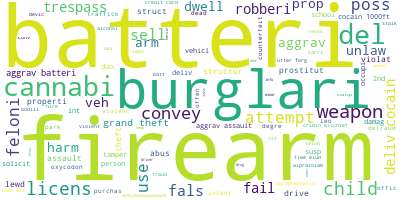

In [187]:
# import wordcloud library
from wordcloud import WordCloud
long_string = ','.join(flat_vocab)
wc = WordCloud(background_color='white',max_words=100,contour_width=3,contour_color='steelblue')
wc.generate(long_string)
wc.to_image()

In [188]:
# import libraries for LDA
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel

In [189]:
# build dictionary and corpus
unique_tokens_arr = [[token] for token in unique_tokens]
charge_dictionary = Dictionary(unique_tokens_arr)
print(charge_dictionary)
#charge_dictionary.filter_extremes(no_below=5, no_above=0.3)
charge_corpus = [charge_dictionary.doc2bow(token) for token in unique_tokens_arr]
print(charge_corpus[:10])

Dictionary(565 unique tokens: ['$100', '$1000', '$1000+', '$200', '$300']...)
[[(0, 1)], [(1, 1)], [(2, 1)], [(3, 1)], [(4, 1)], [(5, 1)], [(6, 1)], [(7, 1)], [(8, 1)], [(9, 1)]]


In [190]:
# build LDA model
#lda = LdaModel(corpus=charge_corpus, id2word=charge_dictionary, num_topics=10)
lda = LdaModel(charge_corpus, num_topics=10)

In [197]:
# visualize results -- TESTING SINGLE TOKEN VOCAB
topics = []
wts = []

# find max topic for each description
for i in range(len(descs)):
    desc_curr = descs[i]
    topic_distr_curr = lda[charge_dictionary.doc2bow(desc_curr)]
    wts_curr = [tup[1] for tup in topic_distr_curr]
    max_topic = np.argmax(wts_curr)
    topics.append(max_topic)
    wts.append(wts_curr)

# build topic columns
topic_cols_list = []
for i in range(5):
    topic_cols_list.append([l[i] for l in wts])
    
# add all to df and visualize
d = {'desc': descs, 'topic': topics, 't0': topic_cols_list[0], 't1': topic_cols_list[1], 't2': topic_cols_list[2],
    't3': topic_cols_list[3], 't4': topic_cols_list[4]}
desc_topic_map = pd.DataFrame(data=d)
display(desc_topic_map[:20])

,desc,topic,t0,t1,t2,t3,t4
0,"[aggrav, assault, firearm]",5,0.025001,0.025001,0.025001,0.025001,0.025001
1,"[feloni, batteri, prior, convict]",8,0.219987,0.220000,0.020002,0.020002,0.020002
2,[cocain],1,0.050001,0.549990,0.050001,0.050001,0.050001
3,[cannabi],0,0.549988,0.050001,0.050001,0.050001,0.050001
4,"[arrest, case, charg]",6,0.025001,0.025001,0.274972,0.025001,0.025001
5,[batteri],9,0.050001,0.050001,0.050001,0.050001,0.050001
6,"[burglari, tool]",1,0.033334,0.699994,0.033334,0.033334,0.033334
7,"[insur, fraud]",1,0.033335,0.366661,0.033335,0.033335,0.033335
8,"[mdma, ecstasi]",5,0.033335,0.033335,0.033335,0.033335,0.033335
9,[methylenedioxymethcath],2,0.050001,0.050001,0.549989,0.050001,0.050001


In [198]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [199]:
pyLDAvis.gensim.prepare(lda, charge_corpus, charge_dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.171780  0.043708       1        1  11.371621
0      0.069728  0.155015       2        1  10.752186
4      0.026025 -0.064830       3        1  10.221236
2      0.018498 -0.034513       4        1  10.044248
7      0.005006 -0.020091       5        1   9.778780
3      0.013187 -0.020529       6        1   9.778771
9      0.012462 -0.021145       7        1   9.690271
5      0.009646 -0.013447       8        1   9.513293
1      0.009360 -0.013775       9        1   9.513285
8      0.007867 -0.010392      10        1   9.336308, topic_info=           Term      Freq     Total Category  logprob  loglift
93         busn  0.000000  0.000000  Default  30.0000   30.000
257        gamb  0.000000  0.000000  Default  29.0000   29.000
187     disrupt  0.000000  0.000000  Default  28.0000   28.000
378       opert  0.000000  0.000000  Default  27.0000   27.000
376        open  0.000000  0.000000  Default  26.0000   26.000
..          ...       ...       ...      ...      ...      ...
334  manslaught  0.549760  0.999981  Topic10  -4.5638    1.773
170         deg  0.549751  0.999964  Topic10  -4.5639    1.773
515      toward  0.549746  0.999960  Topic10  -4.5639    1.773
559         wep  0.549750  0.999969  Topic10  -4.5639    1.773
172         del  0.549750  0.999973  Topic10  -4.5639    1.773

[341 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         3  1.002110     $100
1         1  0.998034    $1000
2         9  0.997834   $1000+
4         7  0.997774     $300
7         3  1.002099     0.15
...     ...       ...      ...
553       2  0.999980  violenc
557       2  0.999982     weap
559      10  1.000031      wep
563       3  1.002085    xlr11
564       4  1.000001       yr

[311 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 1, 5, 3, 8, 4, 10, 6, 2, 9])